In [52]:
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

R_Tierra=6378
a = 1.30262*(R_Tierra)
e = 0.16561
w = 15
r0=1.5*(R_Tierra)
GM=398600.4405 #km**3/S**2
tp = Time("2025-03-31 00:00:00", format="iso", scale="utc")
t=Time("2025-04-01 00:00:00", format="iso", scale="utc")


In [53]:
def Position(t):
    h=1e-6
    tol=1e-8
    max_iter=100
    Delta = (t - tp).to_value('sec')
    l = np.sqrt(GM/a**3) * Delta 
    k = l
    for _ in range(max_iter):
        f_E = k - e * np.sin(k) - l
        f_E_deriv = ((k + h) - e * np.sin(k + h) - l - ((k - h) - e * np.sin(k - h) - l)) / (2 * h)
        Anomalia_Excentrica= k - f_E / f_E_deriv

        if abs(Anomalia_Excentrica - k) < tol:
            k = Anomalia_Excentrica
            break
        k = Anomalia_Excentrica

    # Calcular anomalía verdadera f
    f = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(k / 2))
    

    # Calcular coordenadas r y φ
    r= a*(1-e**2)/(1+e*np.cos(f))
    phi =(f+ np.radians(w)) # Coordenada angular

    return r,phi
r,phi = Position(t)

print(f"r = {r:.6f} km")
print(f"φ = {np.degrees(phi):.6f}grados")

r = 9658.642433 km
φ = 185.667538grados


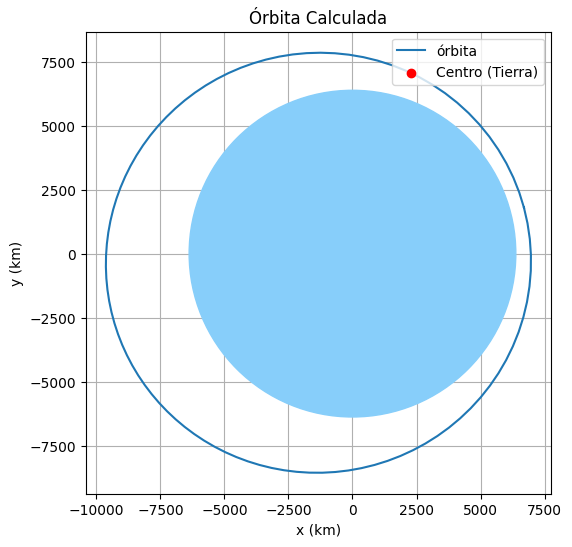

In [54]:
from astropy import units as u

def orbit():
    tiempos = np.linspace(0, 2 * np.pi * np.sqrt(a**3 / GM), 100)  # 100 puntos en una órbita
    r_vals = []
    phi_vals = []
    
    for delta_t in tiempos:
        t_nuevo = tp + delta_t * u.s  # Convertimos delta_t a segundos
        r, phi = Position(t_nuevo)  # Llamamos a la función Posicion()
        r_vals.append(r)
        phi_vals.append(phi)

    # Convertir a coordenadas cartesianas
    x_vals = [r * np.cos(phi) for r, phi in zip(r_vals, phi_vals)]
    y_vals = [r * np.sin(phi) for r, phi in zip(r_vals, phi_vals)]
    Tierra = plt.Circle((0, 0), radius=R_Tierra, color='lightskyblue', zorder=5)
    # Graficar la órbita
    plt.figure(figsize=(6,6))
    plt.plot(x_vals, y_vals, label="órbita")
    plt.scatter(0, 0, color='red', marker='o', label="Centro (Tierra)")  # Tierra en el centro
    plt.gca().add_patch(Tierra)
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    plt.title("Órbita Calculada")
    plt.legend(loc='upper right')
    plt.axis("equal")  # Mantener escala proporcional
    plt.grid()
    plt.show()

# Llamar a la función para graficar
orbit()

In [58]:
def date(r0):
    f =np.arccos((a * (1 - e**2) - r0) / (r0 * e))
    tan_E_half = np.sqrt((1 - e) / (1 + e)) * np.tan(f / 2)
    E = 2 * np.arctan(tan_E_half)
    l=E - e * np.sin(E)
    t=tp +(l * np.sqrt(a**3 / GM))* u.s
    return t.iso
date(r0)



    
    

'2025-03-31 00:53:09.780'